In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000,
                 n_features=64,
                 centers=10,
                 center_box=(-1, +1))

print(X.shape, y.shape)

(1000, 64) (1000,)


In [4]:
X[0]

array([ 0.66249802,  2.73033342,  1.92677487,  0.03005177, -0.25770668,
       -1.59293571, -0.11829867,  0.49776311, -2.90352602, -2.09776488,
       -1.44614523,  1.06588293, -1.09389564,  1.27862709, -0.27676177,
       -0.75729987,  0.43135113, -1.45419136,  1.69794973, -0.66064125,
       -0.73110362, -1.0520757 ,  1.17710102, -1.76821174,  0.50171342,
        1.73661873,  0.05617485,  1.66963169,  0.42302487,  0.19339511,
        1.23239955,  0.13890235, -0.0081922 ,  1.21508567, -0.50951665,
        1.35722624,  2.30263021, -1.3901891 ,  0.43650562,  0.23080074,
        0.67051387,  0.71630401, -0.43085716,  1.44332965,  0.28936109,
        1.4321316 , -0.62501996,  1.21189497,  0.57958618, -2.83703069,
       -1.31274791,  0.57990179,  0.4029578 , -0.28615249,  1.33359961,
       -0.61218106,  1.31783899, -1.06051894, -2.86442938,  1.24113017,
       -1.08540227, -1.03700409, -0.52048295,  2.39135757])

In [5]:
y[0:5]

array([9, 0, 6, 4, 9])

## Visualize

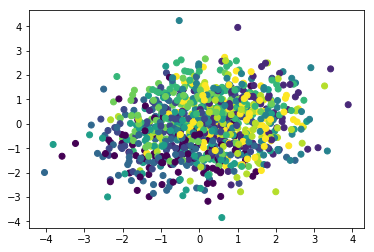

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y.ravel())

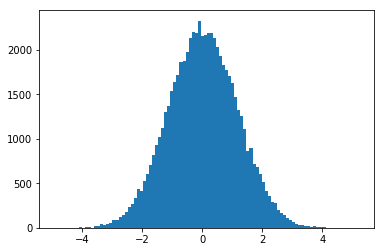

In [11]:
X.mean(), X.min(), X.max()

plt.hist(X.ravel(), bins=100)

tmp = 3

## Preprocessing

### One Hot Encode Label

In [12]:
y_hot = np.eye(10)[y]

print(y.shape, y_hot.shape)
y_hot[:10]

(1000,) (1000, 10)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Define Activate Functions

### Sigmoid

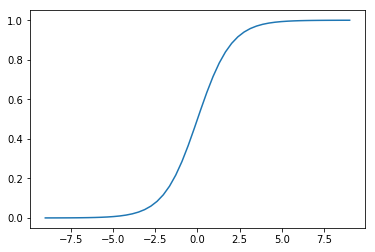

In [13]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(-9, +9)
yy = sigmoid(xx)

plt.plot(xx, yy)

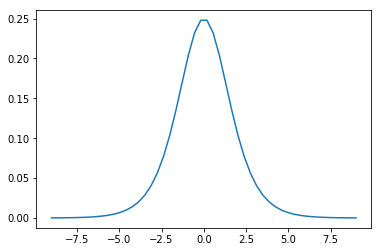

In [14]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

xx = np.linspace(-9, +9)
yy = sigmoid_derivative(xx)

plt.plot(xx, yy)

### tanh

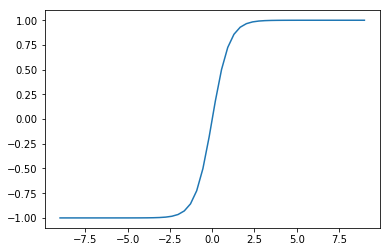

In [17]:
def tanh(x):
    return np.tanh(x)

xx = np.linspace(-9, +9)
yy = tanh(xx)

plt.plot(xx, yy)

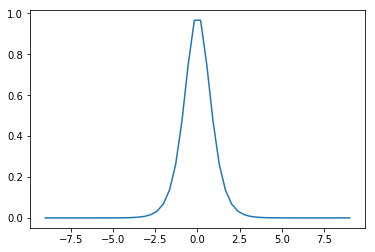

In [19]:
def tanh_derivative(x):
    return 1.0 - np.tanh(x) ** 2

xx = np.linspace(-9, +9)
yy = tanh_derivative(xx)

plt.plot(xx, yy)

### ReLU

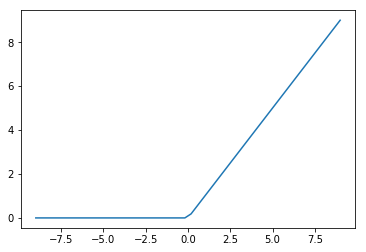

In [20]:
def relu(n):
    return n * (n > 0)

xx = np.linspace(-9, +9)
yy = relu(xx)

plt.plot(xx, yy)

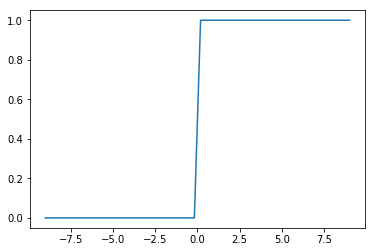

In [21]:
def relu_derivative(n):
    return 1 * (n > 0)

xx = np.linspace(-9, +9)
yy = relu_derivative(xx)

plt.plot(xx, yy)

## Cross Entropy

In [31]:
def cross_entropy(actual, predict, eps=1e-15):
    actual = np.array(actual)
    predict = np.array(predict)
    
    clipped_predict = np.minimum(np.maximum(predict, eps), 1 - eps)
    
    loss = actual * np.log(clipped_predict) + (1 - actual) * np.log(1 - clipped_predict)
    
    return -1.0 * loss.mean()

## Plot

In [63]:
def plot_a(as_, range_=None):
    figure, axes = plt.subplots(nrows=1, ncols=9)
    figure.set_size_inches(24, 4)

    axes[0].hist(as_[0].ravel(), bins=100, range=range_)
    axes[1].hist(as_[1].ravel(), bins=100, range=range_)
    axes[2].hist(as_[2].ravel(), bins=100, range=range_)
    axes[3].hist(as_[3].ravel(), bins=100, range=range_)
    axes[4].hist(as_[4].ravel(), bins=100, range=range_)
    axes[5].hist(as_[5].ravel(), bins=100, range=range_)
    axes[6].hist(as_[6].ravel(), bins=100, range=range_)
    axes[7].hist(as_[7].ravel(), bins=100, range=range_)
    axes[8].hist(as_[8].ravel(), bins=100, range=range_)

In [64]:
def plot_dzs(dzs, range_=None):
    figure, axes = plt.subplots(nrows=1, ncols=8)
    figure.set_size_inches(24, 4)
    
    axes[0].hist(dzs[0].ravel(), bins=100, range=range_)
    axes[1].hist(dzs[1].ravel(), bins=100, range=range_)
    axes[2].hist(dzs[2].ravel(), bins=100, range=range_)
    axes[3].hist(dzs[3].ravel(), bins=100, range=range_)
    axes[4].hist(dzs[4].ravel(), bins=100, range=range_)
    axes[5].hist(dzs[5].ravel(), bins=100, range=range_)
    axes[6].hist(dzs[6].ravel(), bins=100, range=range_)
    axes[7].hist(dzs[7].ravel(), bins=100, range=range_)

## Build a Model

In [65]:
from time import time

def train(X, y, num_epoch, learning_rate, weight_initializer, activation, activation_derivative):
    w1 = weight_initializer(64, 100)
    w2 = weight_initializer(100, 100)
    w3 = weight_initializer(100, 100)
    w4 = weight_initializer(100, 100)
    w5 = weight_initializer(100, 100)
    w6 = weight_initializer(100, 100)
    w7 = weight_initializer(100, 100)
    w8 = weight_initializer(100, 100)
    w9 = weight_initializer(100, 10)
    
    b1 = np.zeros((1, 100))
    b2 = np.zeros((1, 100))
    b3 = np.zeros((1, 100))
    b4 = np.zeros((1, 100))
    b5 = np.zeros((1, 100))
    b6 = np.zeros((1, 100))
    b7 = np.zeros((1, 100))
    b8 = np.zeros((1, 100))
    b9 = np.zeros((1, 10))
    
    history = []
    start = time()
    
    for epoch in range(num_epoch):
        z1 = X.dot(w1) + b1
        a1 = activation(z1)
        z2 = a1.dot(w2) + b2
        a2 = activation(z2)        
        z3 = a2.dot(w3) + b3
        a3 = activation(z3)
        z4 = a3.dot(w4) + b4
        a4 = activation(z4)
        z5 = a4.dot(w5) + b5
        a5 = activation(z5)
        z6 = a5.dot(w6) + b6
        a6 = activation(z6)
        z7 = a6.dot(w7) + b7
        a7 = activation(z7)
        z8 = a7.dot(w8) + b8
        a8 = activation(z8)
        z9 = a8.dot(w9) + b9
        a9 = sigmoid(z9)
        
        y_predict = np.argmax(a9, axis=1)
        accuracy = (y_predict == y).mean()
        
        loss = cross_entropy(y_hot, a9)
        
        history.append({
            'epoch': epoch,
            'elapsed': time() - start,
            'accuracy': accuracy,
            'loss': loss,
        })
        
        if epoch % (num_epoch / 10) == 0:
            print("{:3} accuracy = {:.5f}, loss = {:.5f}".format(epoch, accuracy, loss))
            
        if accuracy > 0.99:
            break
            
        d9 = (a9 - y_hot)
        
        d8 = d9.dot(w9.T) * activation_derivative(a8)
        d7 = d8.dot(w8.T) * activation_derivative(a7)
        d6 = d7.dot(w7.T) * activation_derivative(a6)
        d5 = d6.dot(w6.T) * activation_derivative(a5)
        d4 = d5.dot(w5.T) * activation_derivative(a4)
        d3 = d4.dot(w4.T) * activation_derivative(a3)
        d2 = d3.dot(w3.T) * activation_derivative(a2)
        d1 = d2.dot(w2.T) * activation_derivative(a1)
        
        w9 = w9 - learning_rate * a8.T.dot(d9)
        w8 = w8 - learning_rate * a7.T.dot(d8)
        w7 = w7 - learning_rate * a6.T.dot(d7)
        w6 = w6 - learning_rate * a5.T.dot(d6)
        w5 = w5 - learning_rate * a4.T.dot(d5)
        w4 = w4 - learning_rate * a3.T.dot(d4)
        w3 = w3 - learning_rate * a2.T.dot(d3)
        w2 = w2 - learning_rate * a1.T.dot(d2)
        w1 = w1 - learning_rate * X.T.dot(d1)
        
        b9 = b9 - d9.mean(axis=0)
        b8 = b8 - d8.mean(axis=0)
        b7 = b7 - d7.mean(axis=0)
        b6 = b6 - d6.mean(axis=0)
        b5 = b5 - d5.mean(axis=0)
        b4 = b4 - d4.mean(axis=0)
        b3 = b3 - d3.mean(axis=0)
        b2 = b2 - d2.mean(axis=0)
        b1 = b1 - d1.mean(axis=0)
        
    print("---" * 10)
    print("{:3} accuracy = {:.5f}, loss = {:.5f}".format(epoch, accuracy, loss))

    dz2 = activation_derivative(z1).dot(w2) # dz2 / dz1
    dz3 = activation_derivative(z2).dot(w3) # dz3 / dz2
    dz4 = activation_derivative(z3).dot(w4) # dz4 / dz3
    dz5 = activation_derivative(z4).dot(w5) # dz5 / dz4
    dz6 = activation_derivative(z5).dot(w6) # dz6 / dz5
    dz7 = activation_derivative(z6).dot(w7) # dz7 / dz6
    dz8 = activation_derivative(z7).dot(w8) # dz8 / dz7
    dz9 = activation_derivative(z8).dot(w9) # dz9 / dz8

    as_ = [a1, a2, a3, a4, a5, a6, a7, a8, a9]
    dzs = [dz2, dz3, dz4, dz5, dz6, dz7, dz8, dz9]

    return accuracy, as_, dzs, history

## Case 1 - Small Random Number + Sigmoid

In [66]:
def small_random_number(fan_in, fan_out):
    return np.random.uniform(low=-1.0, high=1.0, size=(fan_in, fan_out))

num_epoch = 100
learning_rate = 0.0001

accuracy, as_, dzs, sigmoid_history = train(X, y, num_epoch, learning_rate,
                                           weight_initializer=small_random_number,
                                           activation=sigmoid,
                                           activation_derivative=sigmoid_derivative)

  0 accuracy = 0.10900, loss = 1.65945
 10 accuracy = 0.13900, loss = 0.32571
 20 accuracy = 0.11900, loss = 0.33666
 30 accuracy = 0.21200, loss = 0.32007
 40 accuracy = 0.23500, loss = 0.29734


/usr/local/var/pyenv/versions/3.6.5/envs/dsschool/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


 50 accuracy = 0.21100, loss = 0.29116
 60 accuracy = 0.20100, loss = 0.29308
 70 accuracy = 0.21200, loss = 0.29359
 80 accuracy = 0.21400, loss = 0.29338
 90 accuracy = 0.21300, loss = 0.29278
------------------------------
 99 accuracy = 0.21300, loss = 0.29344


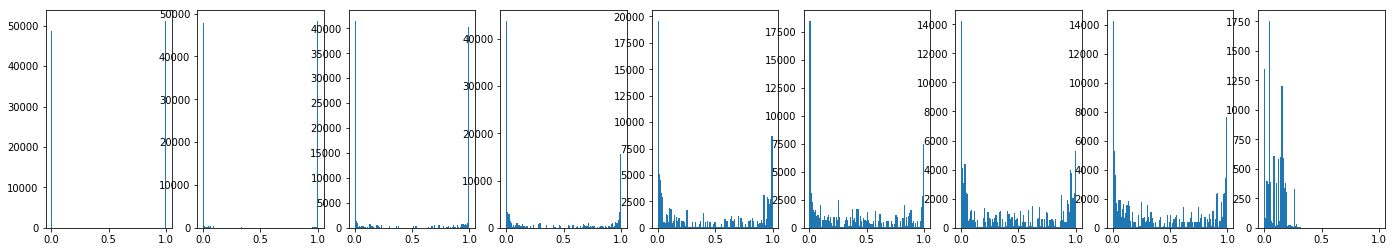

In [70]:
# 결과 시각화
plot_a(as_, range_=(0.0, 1.0))

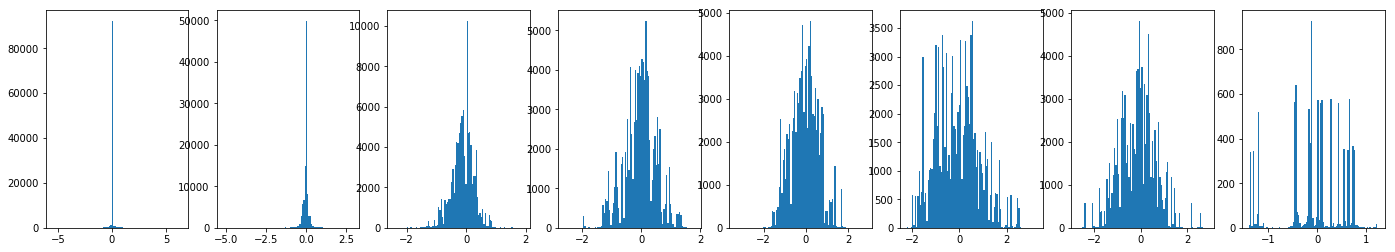

In [71]:
plot_dzs(dzs)

## Case 2 - Small Random Number + tanh

In [90]:
def small_random_number(fan_in, fan_out):
    return np.random.uniform(low=-1.0, high=1.0, size=(fan_in, fan_out))

num_epoch = 100
learning_rate = 0.0001

accuracy, as_, dzs, tanh_history = train(X, y, num_epoch, learning_rate,
                                        weight_initializer=small_random_number,
                                        activation=tanh,
                                        activation_derivative=tanh_derivative)

  0 accuracy = 0.11100, loss = 2.27949
 10 accuracy = 0.10000, loss = 2.65067
 20 accuracy = 0.10000, loss = 1.21778
 30 accuracy = 0.10000, loss = 0.78490
 40 accuracy = 0.15100, loss = 0.86165
 50 accuracy = 0.15600, loss = 0.81926
 60 accuracy = 0.14700, loss = 0.81372
 70 accuracy = 0.17400, loss = 0.57940
 80 accuracy = 0.10000, loss = 0.65206
 90 accuracy = 0.16300, loss = 0.59605
------------------------------
 99 accuracy = 0.17400, loss = 0.53468


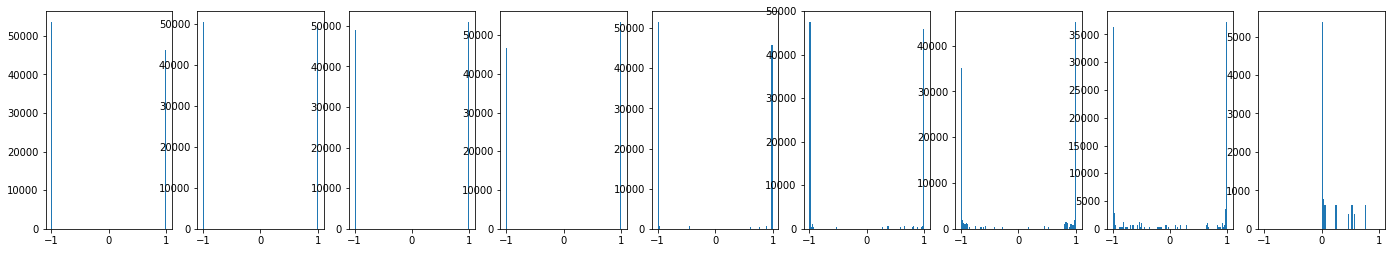

In [91]:
plot_a(as_, range_=(-1.0, 1.0))

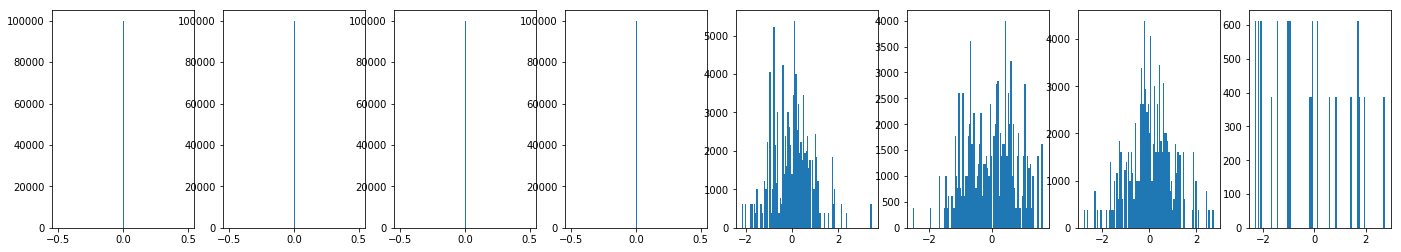

In [92]:
plot_dzs(dzs)

## Case 3 - Xavior Initialization + tanh

In [93]:
def xavior_initialization(fan_in, fan_out):
    a = np.sqrt(6 / (fan_in + fan_out))
    
    return np.random.uniform(low=-a, high=+a, size=(fan_in, fan_out))

In [94]:
accuracy, as_, dzs, xavior_tanh_history = train(X, y, num_epoch, learning_rate,
                                               weight_initializer=xavior_initialization,
                                               activation=tanh,
                                               activation_derivative=tanh_derivative)

  0 accuracy = 0.09800, loss = 0.71344
 10 accuracy = 0.77700, loss = 0.22571
 20 accuracy = 0.91800, loss = 0.14456
 30 accuracy = 0.96300, loss = 0.09551
 40 accuracy = 0.98300, loss = 0.06559
------------------------------
 48 accuracy = 0.99200, loss = 0.05019


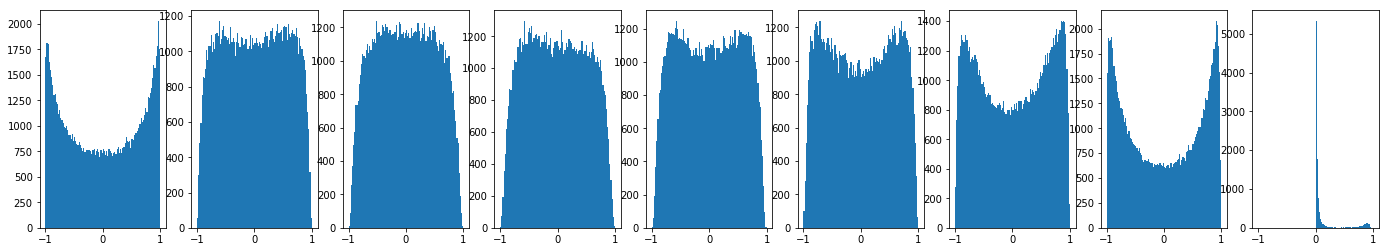

In [95]:
plot_a(as_, range_=(-1.0, 1.0))

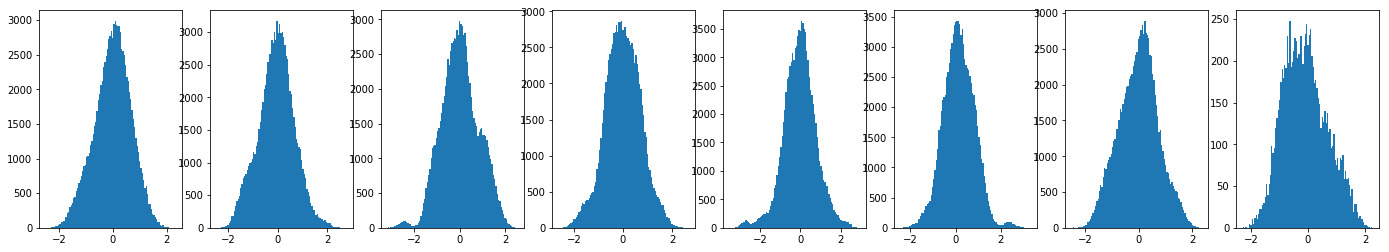

In [96]:
plot_dzs(dzs)

### Visualize

In [97]:
import pandas as pd

In [98]:
sigmoid_history = pd.DataFrame(sigmoid_history)
tanh_history = pd.DataFrame(tanh_history)
xavior_tanh_history = pd.DataFrame(xavior_tanh_history)

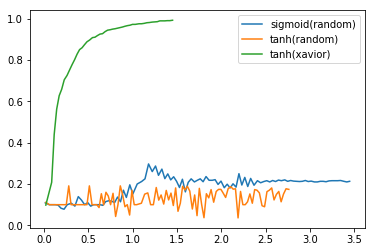

In [99]:
plt.plot(sigmoid_history['elapsed'], sigmoid_history['accuracy'], label='sigmoid(random)')
plt.plot(tanh_history['elapsed'], tanh_history['accuracy'], label='tanh(random)')
plt.plot(xavior_tanh_history['elapsed'], xavior_tanh_history['accuracy'], label='tanh(xavior)')

plt.legend()

## Case 4 - Xavior Initialization + ReLU

In [101]:
accuracy, as_, dzs, xavior_relu_history = train(X, y, num_epoch, learning_rate,
                                               weight_initializer=xavior_initialization,
                                               activation=relu,
                                               activation_derivative=relu_derivative)

  0 accuracy = 0.09900, loss = 0.70805
 10 accuracy = 0.16000, loss = 0.32311
 20 accuracy = 0.24200, loss = 0.31869
 30 accuracy = 0.34700, loss = 0.30346
 40 accuracy = 0.31200, loss = 0.32315
 50 accuracy = 0.50400, loss = 0.25684
 60 accuracy = 0.30600, loss = 0.27959
 70 accuracy = 0.23900, loss = 0.31546
 80 accuracy = 0.55300, loss = 0.21144
 90 accuracy = 0.55700, loss = 0.20979
------------------------------
 99 accuracy = 0.85400, loss = 0.08174


## Case 5 - He Initialization + ReLU

In [103]:
def he_initialization(fan_in, fan_out):
    a = np.sqrt(6 / fan_in)
    
    return np.random.uniform(low=-a, high=+a, size=(fan_in, fan_out))


In [105]:
num_epoch = 100
learning_rate = 0.00003

accuracy, as_, dzs, he_relu_history = train(X, y, num_epoch, learning_rate,
                                           weight_initializer=he_initialization,
                                           activation=relu,
                                           activation_derivative=relu_derivative)

  0 accuracy = 0.09700, loss = 1.18630
 10 accuracy = 0.21700, loss = 0.31755
 20 accuracy = 0.33600, loss = 0.30070
 30 accuracy = 0.44400, loss = 0.27336
 40 accuracy = 0.49900, loss = 0.25446
 50 accuracy = 0.52500, loss = 0.22837
 60 accuracy = 0.67200, loss = 0.17870
 70 accuracy = 0.60900, loss = 0.20119
 80 accuracy = 0.84100, loss = 0.10976
 90 accuracy = 0.82900, loss = 0.10572
------------------------------
 99 accuracy = 0.86200, loss = 0.08197


## Visualize

In [108]:
import pandas as pd

xavior_relu_history = pd.DataFrame(xavior_relu_history)
he_relu_history = pd.DataFrame(he_relu_history)

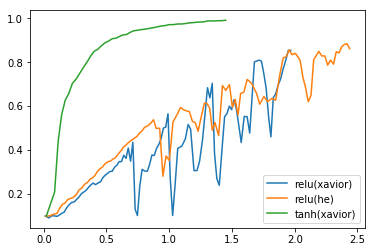

In [109]:
plt.plot(xavior_relu_history['elapsed'], xavior_relu_history['accuracy'], label='relu(xavior)')
plt.plot(he_relu_history['elapsed'], he_relu_history['accuracy'], label='relu(he)')
plt.plot(xavior_tanh_history['elapsed'], xavior_tanh_history['accuracy'], label='tanh(xavior)')

plt.legend()